In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [93]:
# importing data
# let's focus on RBs first

rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/rb_19_21_fantasy.csv", index_col = 0)

rb.head()

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
1,00-0032187,David Johnson,ARI,RB,73.0,224.0,4.0,2015.0,ARI,13.0,...,3.769231,0,0,0,159.50,163.5,65.0,12.269231,13.625000,5.000000
2,00-0033118,Kenyan Drake,ARI,RB,73.0,211.0,3.0,2016.0,2TM,14.0,...,6.083333,0,0,0,237.20,179.5,88.0,16.942857,11.966667,7.333333
3,00-0034681,Chase Edmonds,ARI,RB,69.0,210.0,1.0,2018.0,ARI,13.0,...,8.333333,0,0,0,88.80,141.5,121.5,6.830769,8.843750,10.125000
14,00-0030465,Kenjon Barner,ATL,RB,69.0,195.0,6.0,2013.0,ATL,14.0,...,NaN,0,0,0,12.12,NaN,NaN,0.865714,NaN,NaN
15,00-0031285,Devonta Freeman,ATL,RB,68.0,206.0,5.0,2014.0,ATL,14.0,...,7.062500,0,0,0,227.10,32.5,130.0,16.221429,6.500000,8.125000


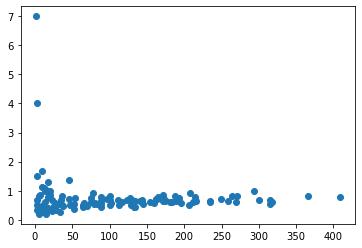

In [94]:
plt.scatter(rb['ttl_opp20'], rb['fp_per_opp20'])

In [95]:
rb.loc[rb['fp_per_opp20'] > 2]

,player_id,player_name,team_19,position_19,height_19,weight_19,years_exp_19,rookie_year_19,Tm_19,G_19,...,fp_per_gm21,rookie19,rookie20,rookie21,FantasyPoints_19hppr,FantasyPoints_20hppr,FantasyPoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr
402,00-0035924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.538462,0,1,0,NaN,7.5,8.5,NaN,0.535714,0.653846
409,00-0036187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.187500,0,1,0,NaN,9.0,4.5,NaN,0.642857,0.281250


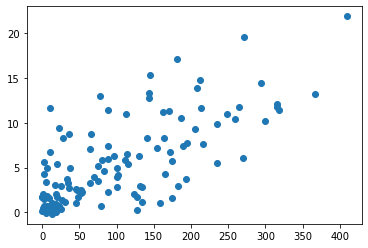

In [96]:
plt.scatter(rb['ttl_opp20'], rb['fp_per_gm21'])

In [97]:
rb.columns

Index(['player_id', 'player_name', 'team_19', 'position_19', 'height_19',
       'weight_19', 'years_exp_19', 'rookie_year_19', 'Tm_19', 'G_19', 'GS_19',
       'Tgt_19', 'Rec_19', 'RushingYds_19', 'RushingTD_19', 'RushingAtt_19',
       'ReceivingYds_19', 'ReceivingTD_19', 'FantasyPoints_19', 'Fumbles_19',
       'FumblesLost_19', 'key_0_20', 'team_20', 'position_20', 'height_20',
       'weight_20', 'years_exp_20', 'rookie_year_20', 'Tm_20', 'G_20', 'GS_20',
       'Tgt_20', 'Rec_20', 'RushingYds_20', 'RushingTD_20', 'RushingAtt_20',
       'ReceivingYds_20', 'ReceivingTD_20', 'FantasyPoints_20', 'Fumbles_20',
       'FumblesLost_20', 'team_21', 'position_21', 'height_21', 'weight_21',
       'years_exp_21', 'rookie_year_21', 'Tm_21', 'Pos_21', 'Age_21',
       'FantasyPoints_21', 'pct_gs19', 'pct_gs20', 'avg_per_rush19',
       'avg_per_rush20', 'avg_per_catch19', 'avg_per_catch20', 'avg_per_tgt19',
       'avg_per_tgt20', 'ttl_touch19', 'ttl_touch20', 'ttl_opp19', 'ttl_opp20',
    

For some initial modeling, let's use FantasyPoints of prev. 2 seasons; total opps prev. 2 seasons; fp_per_game; years_exp

In [116]:
rb_small = rb[['player_id', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'avg_per_rush20', 
               'avg_per_catch20', 'fp_per_gm21hppr']]

rb_X = rb_small.set_index('player_id')

rb_target = rb_small['fp_per_gm21hppr']


In [117]:
rb_target = rb_target.fillna(0)

In [118]:
rb_X = rb_X.fillna(0)

rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


In [119]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000


In [120]:
# splitting into train and test

rb_x_train, rb_x_test, rb_y_train, rb_y_test = train_test_split(rb_X, rb_target, test_size = .25, random_state = 0)



Decision trees don't need much pre-processing, so let's try modeling with one first

In [121]:
# decision tree regressor

dt_reg = tree.DecisionTreeRegressor(random_state = 0)

dt_reg = dt_reg.fit(rb_x_train, rb_y_train)


In [122]:
dt_pred_train = dt_reg.predict(rb_x_train)
dt_pred_test = dt_reg.predict(rb_x_test)

dt_pred_test

array([ 2.        ,  5.35714286,  2.        , 11.32142857,  6.        ,
        3.        ,  5.86363636,  6.875     ,  6.82142857,  2.26923077,
        8.66666667, 10.14705882,  3.75      , 20.76470588,  2.91666667,
        6.        , 10.14705882,  0.28571429, 12.375     , 10.14705882,
       13.69230769,  0.80769231,  2.91666667,  5.78125   ,  4.41666667,
        3.47058824,  5.        , 13.53333333, 12.375     ,  0.75      ,
        0.875     ,  0.80769231,  2.22222222])

In [123]:
values = ['Decision Tree', np.sqrt(mean_squared_error(rb_y_train, dt_pred_train)),
         np.sqrt(mean_squared_error(rb_y_test, dt_pred_test))]

values

['Decision Tree', 0.0, 0.46530446598976327]

In [124]:
# Visualizing DT
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere

import graphviz

dot_tree = tree.export_graphviz(dt_reg, out_file ='tree.dot')

In [125]:
graph = graphviz.Source(dot_tree)

In [126]:
# graph

AttributeError: 'NoneType' object has no attribute 'splitlines'

### Pre-Processing for other modeling

In [109]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037
years_exp_21,0.329865,0.026779,1.000000,0.050259
ttl_opp20,0.530452,0.866037,0.050259,1.000000


In [114]:
rb_X.describe()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20
count,129.000000,129.000000,129.000000,129.000000
mean,6.233781,5.943615,3.751938,95.643411
std,7.066929,5.699271,2.304991,95.060080
min,-1.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,2.000000,13.000000
50%,3.693333,4.545455,3.000000,69.000000
75%,10.762500,8.769231,5.000000,159.000000
max,32.950000,27.166667,14.000000,409.000000


In [112]:
kewed_rb = np.log(rb_X)

sc = StandardScaler()

rb_trans = sc.fit_transform(skewed_rb)

rb_trans = pd.DataFrame(rb_trans, columns = skewed_cols)

rb_trans.head()

C:\Users\steph\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\steph\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').